## <font color=green> *FACTS GMD:* <font color=black> Figure 6 </font>
#### <font color=blue> *Total RSL projections for New York City under four different Workflows under different SSP scenarios.* </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
from datetime import date
import os

### <font color=blue> List of **Workflows** and **Data** to be used </font>

In [2]:
# Load FACTS module names/data as a dataframe.
df = pd.read_fwf('001_input_Names_Modules_dataFILES/Fig6_IP_workflow_dataFILE_LOCAL.txt',comment = '#')
df

,Component,Workflow,DataFile
0,total,wf1f,total.workflow.wf1f.local.nc
1,total,wf2f,total.workflow.wf2f.local.nc
2,total,wf3f,total.workflow.wf3f.local.nc
3,total,wf4,total.workflow.wf4.local.nc


### <font color=blue>Extract **.nc** data \& Find Percentiles</font>

In [3]:
import fig_ncTOdf as IP
#
EXPDATE   = 221217                    # Experiment date.
SCENARIO    = ['ssp119','ssp126', 'ssp245', 'ssp370','ssp585'];  
#
df_ptile = IP.wf_Fig_nc(df,SCENARIO,EXPDATE,2100)
#
display(df_ptile)


,Component,Workflow,SSP,Year,col_50,col_5,col_17,col_83,col_95
0,total,wf1f,ssp119,2020,0.095,-0.02000,0.03300,0.15700,0.20705
1,total,wf1f,ssp119,2030,0.168,0.01695,0.08483,0.25400,0.32400
2,total,wf1f,ssp119,2040,0.242,0.07595,0.14800,0.33600,0.40900
3,total,wf1f,ssp119,2050,0.310,0.11500,0.19800,0.42200,0.51005
4,total,wf1f,ssp119,2060,0.369,0.14090,0.23900,0.50200,0.60500
...,...,...,...,...,...,...,...,...,...
130,total,wf4,ssp585,2060,0.550,0.29895,0.39900,0.72600,0.90200
131,total,wf4,ssp585,2070,0.706,0.40090,0.51800,0.94400,1.21215
132,total,wf4,ssp585,2080,0.873,0.49995,0.63800,1.18502,1.58445
133,total,wf4,ssp585,2090,1.051,0.59795,0.76100,1.45700,2.04610


### <font color=green> **PLOT** RSL for workflows under various SSPs </font>

In [4]:
color_ssp119 = np.array([0, 173,207])/255
color_ssp126 = np.array([23  ,60 ,  102])/255
color_ssp245 = np.array([247 ,148,  32])/255
color_ssp370 = np.array([231 ,29 ,  37])/255
color_ssp585 = np.array([149 ,27 ,  30])/255
scencolors=[color_ssp585, color_ssp245, color_ssp126]
#
# Workflow Components.
wf1f     = ['GrIS-FittedISMIP', 'AIS-ipccar5', 'Glaciers-ipccar5-GMIP2']
wf2f     = ['GrIS-FittedISMIP', 'AIS-larmip', 'Glaciers-ipccar5-GMIP2']
wf3f     = ['GrIS-FittedISMIP', 'AIS-deconto21', 'Glaciers-ipccar5-GMIP2']
wf4      = ['GrIS-bamber19', 'AIS-bamber19', 'Glaciers-ipccar5-GMIP2']
workflow = ["wf1f","wf2f","wf3f","wf4"]

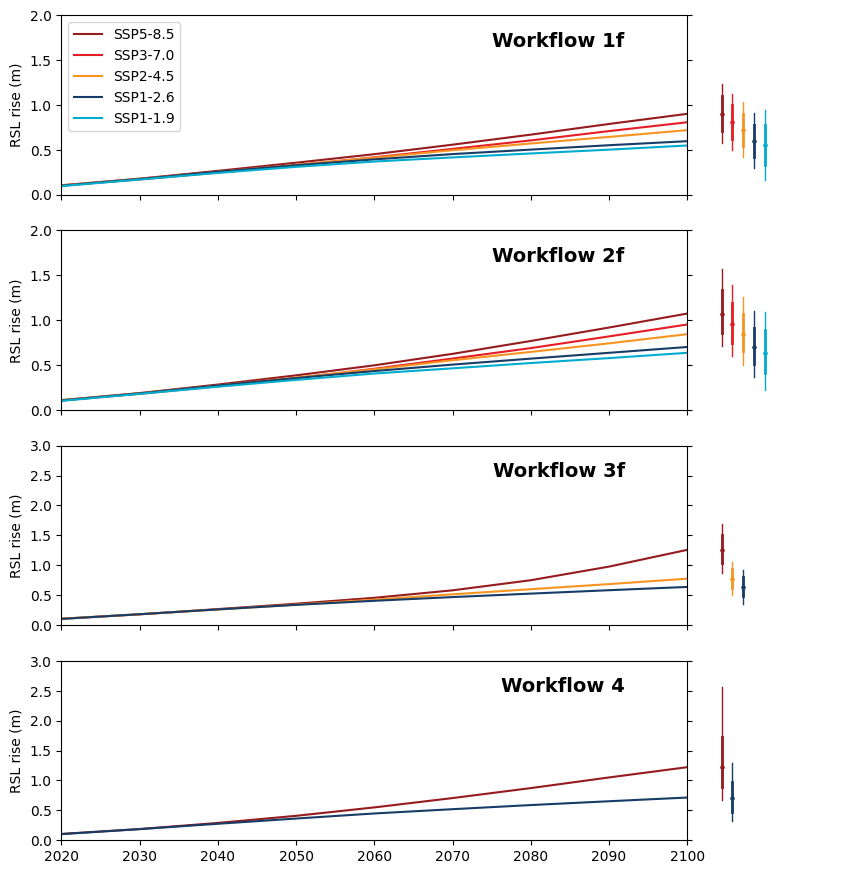

In [5]:
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(55,30), 'figure.dpi':100})
# Initialize the grid
grid   = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid01 = grid[0].subgridspec(4, 5)
#
XAX1        = df_ptile.loc[:,"Year"].unique()
SSP         = np.flip(df_ptile.loc[:,"SSP"].unique())
#
xlim  = [2020,2100]
xlim1 = [.1,2]
#
ax1_wf1f = plt.subplot(grid01[0, :4]); ax2_wf1f = plt.subplot(grid01[0, 4]);
ax1_wf2f = plt.subplot(grid01[1, :4]); ax2_wf2f = plt.subplot(grid01[1, 4]);
ax1_wf3f = plt.subplot(grid01[2, :4]); ax2_wf3f = plt.subplot(grid01[2, 4]);
ax1_wf4  = plt.subplot(grid01[3, :4]); ax2_wf4  = plt.subplot(grid01[3, 4]);
#
for wf in workflow:
    # Select subplot axis based on workflow
    ax1 = eval(f'ax1_{wf}');    ax2 = eval(f'ax2_{wf}')
    # X axis for the Right (Bar) Plot.
    XAX2 = np.array([[.2,.2]]) 
    yylim = []
    #
    for ss in SSP: # Loop through each SSP
        if (ss == 'ssp245') & (wf == 'wf4'):
            continue
        if (ss == 'ssp119') & ((wf == 'wf3f') or (wf == 'wf4')):
            continue
        if (ss == 'ssp370') & ((wf == 'wf3f') or (wf == 'wf4')):
            continue
        #
        # Plot Left
        Yax1 = df_ptile.loc[((df_ptile["Workflow"] == wf) & (df_ptile['SSP'] == ss)),"col_50" ] 
        ax1.plot(XAX1, Yax1, label = ss[:3].upper()+ss[3]+'-'+ss[4]+'.'+ss[5], color = eval(f'color_{ss}'))
        #
        # Plot Right
        Yax2_1 = df_ptile.loc[((df_ptile["Workflow"] == wf) & (df_ptile['SSP'] == ss) & (df_ptile['Year'] == 2100)),("col_5", "col_95") ].values
        Yax2_2 = df_ptile.loc[((df_ptile["Workflow"] == wf) & (df_ptile['SSP'] == ss) & (df_ptile['Year'] == 2100)),("col_17", "col_83") ].values 
        Yax2_3 = df_ptile.loc[((df_ptile["Workflow"] == wf) & (df_ptile['SSP'] == ss) & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values 
        #
        ax2.plot(XAX2.transpose(), Yax2_1.transpose(), label = ss, color = eval(f'color_{ss}'),linewidth=1,)
        ax2.plot(XAX2.transpose(), Yax2_2.transpose(), label = ss, color = eval(f'color_{ss}'),linewidth=2)
        ax2.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = eval(f'color_{ss}'),ms = 2,mfc='none')
        XAX2 = XAX2+.15
        #
        # Dynamix y axis
        yylim.append( Yax2_1[0] )
    #
    ylim =[0, 0.07 + np.max(np.unique(np.array(yylim)))]
    #
    # Use Common Yaxis limits across panels.
    if wf == 'wf1f':  ylim =[0, 2]
    if wf == 'wf2f':  ylim =[0, 2]
    if wf == 'wf3f':  ylim =[0, 3]
    if wf == 'wf4':  ylim = [0, 3]
    #
    ax1.tick_params(axis='both', labelsize=10)
    ax1.yaxis.set_ticks_position('both')
    if wf == 'wf1f': ax1.legend(loc='upper left',prop={'size': 10}); 
    ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax1.set_ylabel("RSL rise (m)"); #ax1.grid()
    # WorkFlow Title.
    ax1.text(.9, .91, 'Workflow '+wf[2:], horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=14,transform=ax1.transAxes)
    if wf != 'wf4': ax1.xaxis.set_ticklabels([])
    #
    ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
# Get todays date.
today = date.today().strftime('%Y-%m-%d')
# Save Figure.
figureNAME = "Fig6-"+today+".pdf" 
if os.path.exists(figureNAME): os.remove(figureNAME)
plt.savefig(figureNAME, format="pdf", bbox_inches="tight")
# 
plt.show()